In [ ]:
!unzip images.zip

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from imutils import paths
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization,Input,GlobalAveragePooling2D,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import glob
import shutil
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import math

%matplotlib inline

In [ ]:
TRAIN_DIR_expr = '/content/images/train/'

TEST_DIR_expr = '/content/images/test/'

In [ ]:

def load_dataset(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [ ]:
train_expr = pd.DataFrame()
train_expr['image'], train_expr['label'] = load_dataset(TRAIN_DIR_expr)
train_expr = train_expr.sample(frac=1).reset_index(drop=True)
train_expr.head()

happy Completed
sad Completed
disgust Completed
neutral Completed
fear Completed
angry Completed
surprise Completed


,image,label
0,/content/images/train/sad/33556.jpg,sad
1,/content/images/train/sad/17340.jpg,sad
2,/content/images/train/happy/11666.jpg,happy
3,/content/images/train/angry/1123.jpg,angry
4,/content/images/train/surprise/20484.jpg,surprise


In [ ]:
test_expr = pd.DataFrame()
test_expr['image'], test_expr['label'] = load_dataset(TEST_DIR_expr)
test_expr.head()

happy Completed
sad Completed
disgust Completed
neutral Completed
fear Completed
angry Completed
surprise Completed


,image,label
0,/content/images/test/happy/8338.jpg,happy
1,/content/images/test/happy/32958.jpg,happy
2,/content/images/test/happy/20252.jpg,happy
3,/content/images/test/happy/2930.jpg,happy
4,/content/images/test/happy/18873.jpg,happy


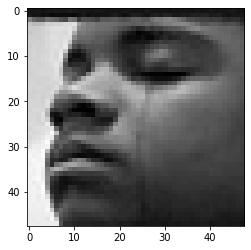

In [ ]:
from PIL import Image
img_expr = Image.open(train_expr['image'][0])
plt.imshow(img_expr, cmap='gray');

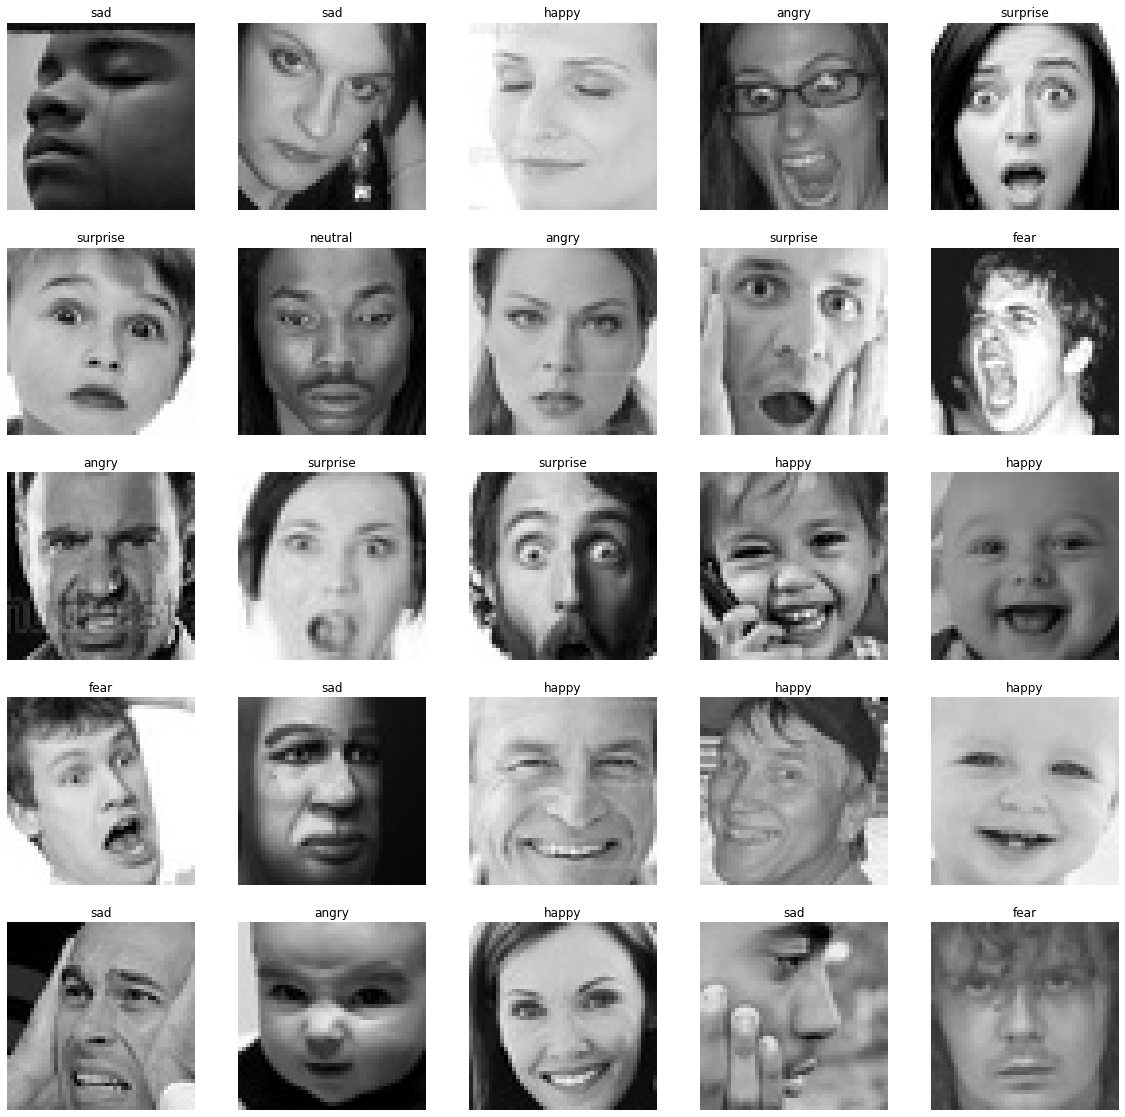

In [ ]:
plt.figure(figsize=(20,20))
files = train_expr.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img_expr = load_img(file)
    img_expr = np.array(img_expr)
    plt.imshow(img_expr)
    plt.title(label)
    plt.axis('off')

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img_ex = load_img(image, grayscale=True)
        img_ex = np.array(img_ex)
        features.append(img_ex)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
from tqdm.notebook import tqdm
train_features_expr = extract_features(train_expr['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
test_features_expr = extract_features(test_expr['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
x_expr_train = train_features_expr/255.0
x_expr_test = test_features_expr/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_expre = LabelEncoder()
le_expre.fit(train_expr['label'])
y_expression_train = le_expre.transform(train_expr['label'])
y_expression_test = le_expre.transform(test_expr['label'])

In [ ]:
y_expr_train = to_categorical(y_expression_train, num_classes=7)
y_expr_test = to_categorical(y_expression_test, num_classes=7)

In [ ]:
input_expre_shape = (48, 48, 1)
output_class = 7

In [35]:
model_expr = Sequential()
model_expr.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_expre_shape))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Flatten())

model_expr.add(Dense(512, activation='relu'))
model_expr.add(Dropout(0.4))
model_expr.add(Dense(256, activation='relu'))
model_expr.add(Dropout(0.3))

model_expr.add(Dense(output_class, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model_expr.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:

# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [ ]:
history = model_expr.fit(x=x_expr_train, y=y_expr_train, batch_size=128, epochs=2, validation_data=(x_expr_test, y_expr_test))

Epoch 1/2
 96/226 [===========>..................] - ETA: 15:23 - loss: 1.8459 - accuracy: 0.2327

In [ ]:
acc = model_expr.evaluate(x_expr_test, y_expr_test)
print('> %.3f' % (acc * 100.0))

InvalidArgumentError: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for the facial expression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()